In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
%matplotlib inline



## Gather data

In [2]:

df = pd.read_csv('survey_results_public.csv')
df.head().T

,0,1,2,3,4
Respondent,1,2,3,4,5
Professional,Student,Student,Professional developer,Professional non-developer who sometimes write...,Professional developer
ProgramHobby,"Yes, both","Yes, both","Yes, both","Yes, both","Yes, I program as a hobby"
Country,United States,United Kingdom,United Kingdom,United States,Switzerland
University,No,"Yes, full-time",No,No,No
EmploymentStatus,"Not employed, and not looking for work",Employed part-time,Employed full-time,Employed full-time,Employed full-time
FormalEducation,Secondary school,Some college/university study without earning ...,Bachelor's degree,Doctoral degree,Master's degree
MajorUndergrad,NaN,Computer science or software engineering,Computer science or software engineering,A non-computer-focused engineering discipline,Computer science or software engineering
HomeRemote,NaN,"More than half, but not all, the time","Less than half the time, but at least one day ...","Less than half the time, but at least one day ...",Never
CompanySize,NaN,20 to 99 employees,"10,000 or more employees","10,000 or more employees",10 to 19 employees


In [3]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

## Understand the business: Questions to explore
1. Is there any difference between male and female in terms of education?
2. For people who are using stackoverflow, how many percents of them think it is really helpful?
3. Are those people who likes stackoverflow making more money?

In [26]:
## question 1: Is there any difference between male and female in terms of education?
df_q1 = df[['FormalEducation','Gender']]
male_num = len(df_q1[df_q1.Gender == "Male"])
female_num = len(df_q1[df_q1.Gender == "Female"])
total_num = len(df_q1)

def gender_portion(df_q1, degree):
    male = len(df_q1[(df_q1.Gender == "Male") & (df_q1.FormalEducation == degree)])/male_num
    female = len(df_q1[(df_q1.Gender == "Female") & (df_q1.FormalEducation == degree)])/female_num
    return male, female


# Bachelor percent in male and female
Bache_male, Bache_female = gender_portion(df_q1,"Bachelor's degree")

# Master percent in male and female
MS_male, MS_female = gender_portion(df_q1,"Master's degree")

# PHD percent in male and female
PHD_male, PHD_female = gender_portion(df_q1,"Doctoral degree")

print("For Bachelor, the percent for male and female are " + str(Bache_male) +" and " + str(Bache_female))
print("For Master, the percent for male and female are " + str(MS_male) +" and " + str(MS_female))
print("For PHD, the percent for male and female are " + str(PHD_male) +" and " + str(PHD_female))

##answer to question: there are difference between male and female for education. For all bachelor, Master and PHD, women have higher 
## percents.

For Bachelor, the percent for male and female are 0.42426161005413277 and 0.5080769230769231
For Master, the percent for male and female are 0.22207097407325335 and 0.2653846153846154
For PHD, the percent for male and female are 0.026148342777549148 and 0.03769230769230769


Text(0,0.5,'Percent')

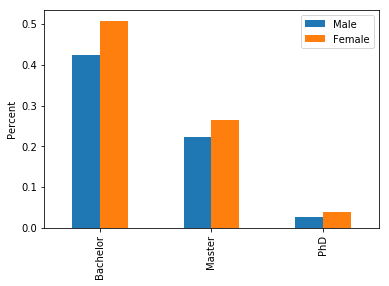

In [39]:
## Distribution plot of education level by gender.
gender_data = {'Male':[Bache_male,MS_male,PHD_male],'Female':[Bache_female,MS_female,PHD_female]}
gender_df = pd.DataFrame(gender_data,index = ['Bachelor','Master','PhD'])
gender_df.plot.bar()
plt.ylabel('Percent')

In [19]:
## question 2:For people who are using stackoverflow, how many percents of them think it is really helpful?
len(df[(df.StackOverflowHelpful == "Agree") | (df.StackOverflowHelpful == "Strongly agree")])/len(df)

## There are about 60% of people think stackoverflow is helpful.

0.5916095890410958

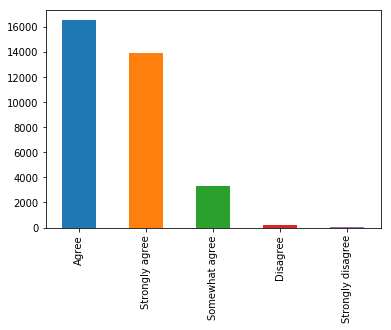

In [44]:
## Bar plot of sentiment on stack overflow
df.StackOverflowHelpful.value_counts().plot.bar()

In [20]:
## question 3:Are those people who likes stackoverflow making more money?
like_sal = df[(df.StackOverflowHelpful == "Agree") | (df.StackOverflowHelpful == "Strongly agree")].Salary.mean()
dislike_sal = df[(df.StackOverflowHelpful == "Disagree") | (df.StackOverflowHelpful == "Strongly disagree")].Salary.mean()

print("The average salary for people like stackoverflow is " + str(like_sal))
print("The average salary for people dislike stackoverflow is " + str(dislike_sal))

##People who dislike stackoverflow make more averaged money.

The average salary for people like stackoverflow is 57149.6659134539
The average salary for people dislike stackoverflow is 60858.65888772343


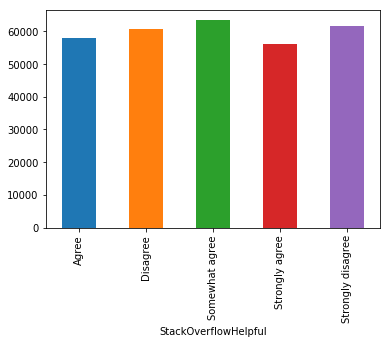

In [46]:
## distribution of mean salary by sentiment on stack overflow
df.groupby('StackOverflowHelpful').Salary.mean().plot.bar()

## Understand data

In [4]:

print(df.shape)
## which columns have the top 5 amount of missing data?
df.isna().sum().sort_values(ascending=False).head()

(51392, 154)


ExCoder10Years        50475
ExCoderNotForMe       50471
ExCoderWillNotCode    50470
ExCoderReturn         50469
ExCoderBalance        50469
dtype: int64

In [5]:
len(df.isna().sum() < int(0.75*df.shape[0]))

154

## Prepare data: Handel missing data

In [6]:
## If the missing value amount is more than 75% of the data, remove the columns.There are 14 columns are removed.
df_T = df.T[df.isna().sum() < int(0.75*df.shape[0])]
df_1 = df_T.T
df_1.shape

(51392, 140)

In [7]:
## Select important variables to salary
df_sim = df_1[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction','Salary']]
df_sim.isna().sum()
## There are many missing data. Since we want to predict salary, so null in salary should be removed.

CareerSatisfaction            8697
HoursPerWeek                 30792
JobSatisfaction              11016
StackOverflowSatisfaction    14800
Salary                       38501
dtype: int64

In [8]:
df_2 = df_sim.dropna(subset=['Salary'], axis=0)
df_2.shape
## There are 12891 rows left

(12891, 5)

In [9]:
## Is there any null in current dataframw after removing nulll salary?
df_2.isna().sum()
## Yes, there are still null.

CareerSatisfaction             30
HoursPerWeek                 7206
JobSatisfaction                39
StackOverflowSatisfaction     874
Salary                          0
dtype: int64

In [10]:
df_2.head()

,CareerSatisfaction,HoursPerWeek,JobSatisfaction,StackOverflowSatisfaction,Salary
2,8,NaN,9,8,113750
14,8,NaN,8,8,100000
17,9,NaN,8,8,130000
18,5,NaN,3,NaN,82500
22,8,NaN,9,8,100764


In [11]:


##We will impute the missing value for the other four variables.
##Since career satisfaction, job satisfaction and stackoverflow satisfaction are categorical variables, we use mode to impute, for 
##Hours per week, we use mean.
fill_mode = lambda col: col.fillna(col.mode()[0])
fill_mean = lambda col: col.fillna(col.mean())
df_final = pd.DataFrame()
df_final[['CareerSatisfaction', 'JobSatisfaction', 'StackOverflowSatisfaction']] = df_2[['CareerSatisfaction', 'JobSatisfaction', 'StackOverflowSatisfaction']].\
apply(fill_mode, axis=0).astype(str)
df_final[['HoursPerWeek']] = df_2[['HoursPerWeek']].apply(fill_mean, axis=0)
df_final.head()

,CareerSatisfaction,JobSatisfaction,StackOverflowSatisfaction,HoursPerWeek
2,8.0,9.0,8.0,2.64292
14,8.0,8.0,8.0,2.64292
17,9.0,8.0,8.0,2.64292
18,5.0,3.0,8.0,2.64292
22,8.0,9.0,8.0,2.64292


In [12]:
df_final.isna().sum()

CareerSatisfaction           0
JobSatisfaction              0
StackOverflowSatisfaction    0
HoursPerWeek                 0
dtype: int64

In [13]:
df_final.shape

(12891, 4)

## Prepare data:  Deal with categorical variables

In [14]:
## creat dummuy variables for CareerSatisfaction,JobSatisfaction,StackOverflowSatisfaction
x_final = pd.concat([pd.get_dummies(df_final[['CareerSatisfaction','JobSatisfaction','StackOverflowSatisfaction']]),df_final.HoursPerWeek],1)

In [15]:
x_final.head()

,CareerSatisfaction_0.0,CareerSatisfaction_1.0,CareerSatisfaction_10.0,CareerSatisfaction_2.0,CareerSatisfaction_3.0,CareerSatisfaction_4.0,CareerSatisfaction_5.0,CareerSatisfaction_6.0,CareerSatisfaction_7.0,CareerSatisfaction_8.0,...,StackOverflowSatisfaction_10.0,StackOverflowSatisfaction_2.0,StackOverflowSatisfaction_3.0,StackOverflowSatisfaction_4.0,StackOverflowSatisfaction_5.0,StackOverflowSatisfaction_6.0,StackOverflowSatisfaction_7.0,StackOverflowSatisfaction_8.0,StackOverflowSatisfaction_9.0,HoursPerWeek
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2.64292
14,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2.64292
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2.64292
18,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,2.64292
22,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2.64292


In [16]:
x_final.shape

(12891, 34)

In [17]:
y = df_2.Salary
y.shape

(12891,)

## Fit a linear regression model to predict salary


In [112]:
X_train, X_test, y_train, y_test = train_test_split(x_final, y, test_size=0.4, random_state=35)
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

### Evaluate the model

In [114]:
## The linear regression model is not doing well on predicting salary.
print("train score is " + str(train_score))
print("test score is " + str(test_score))

train score is 0.053672286674173564
test score is 0.037595026232477236


In [47]:
import os

os.system('jupyter nbconvert --to html project1.ipynb')

0